In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [4]:
# Load the wine dataset
wine = datasets.load_wine(as_frame=True)
df = wine.frame
print(df.head())
print(df.describe().T)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [5]:
# Show the data
print(df.head(10))
print(df)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

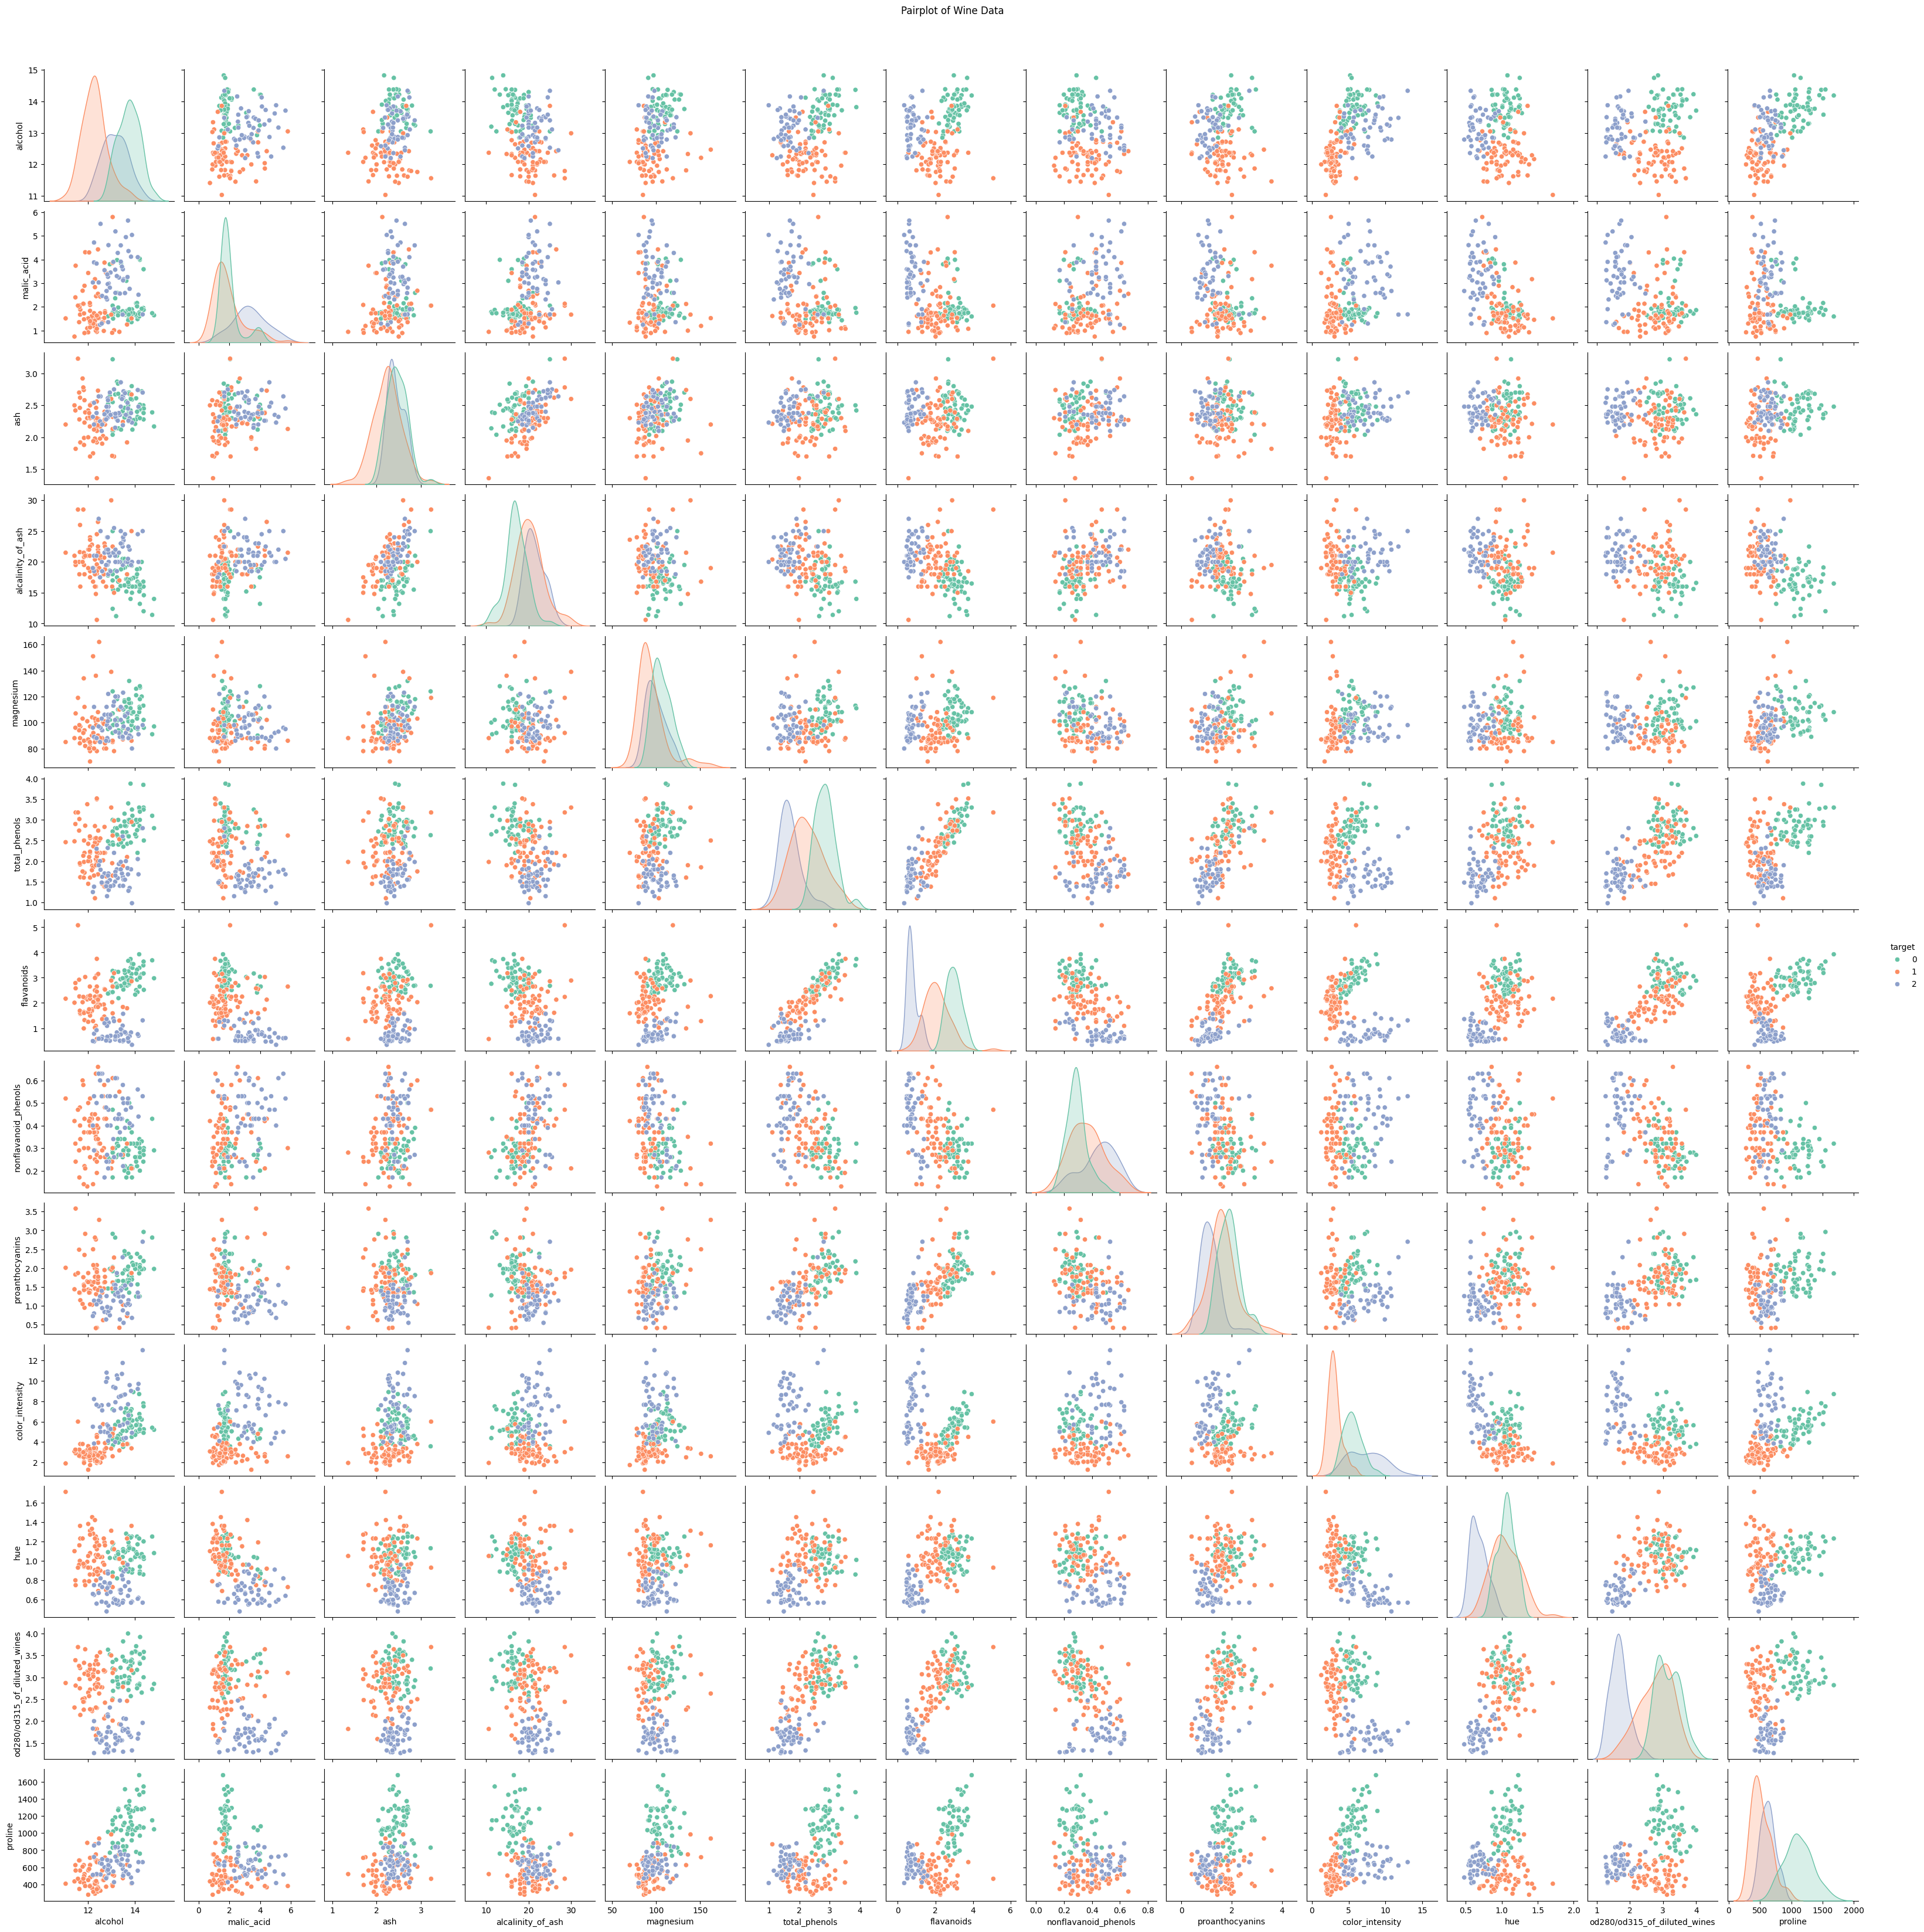

In [6]:
# Ensure the 'target' column exists in the dataframe
if 'target' not in df.columns:
	df['target'] = wine.target

# Visualisasi data dengan Grafik pada data Wine
sns.pairplot(df, hue='target', palette='Set2')
plt.suptitle('Pairplot of Wine Data', y=1.02)
plt.show()

In [7]:
# Split training and testing data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(f"Jumlah data training: {len(X_train)}")

Jumlah data training: 124


In [8]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

In [9]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      0.89      0.91        27
           2       0.79      0.92      0.85        12

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



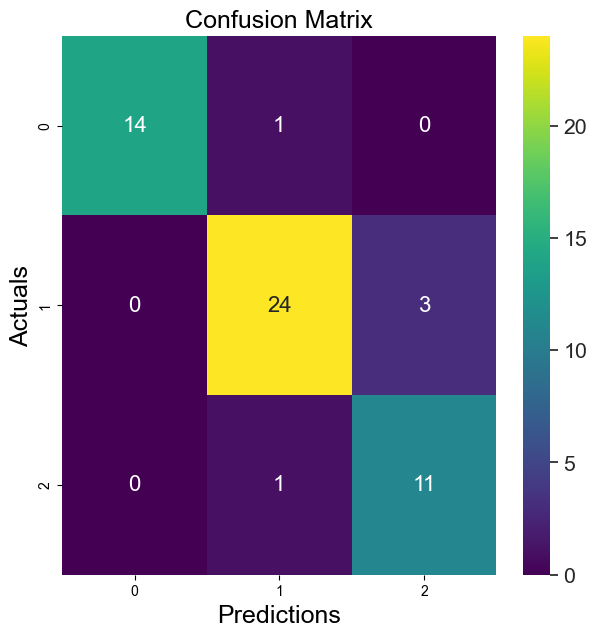

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax, annot=True, annot_kws={"size": 16}, cmap='viridis') # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

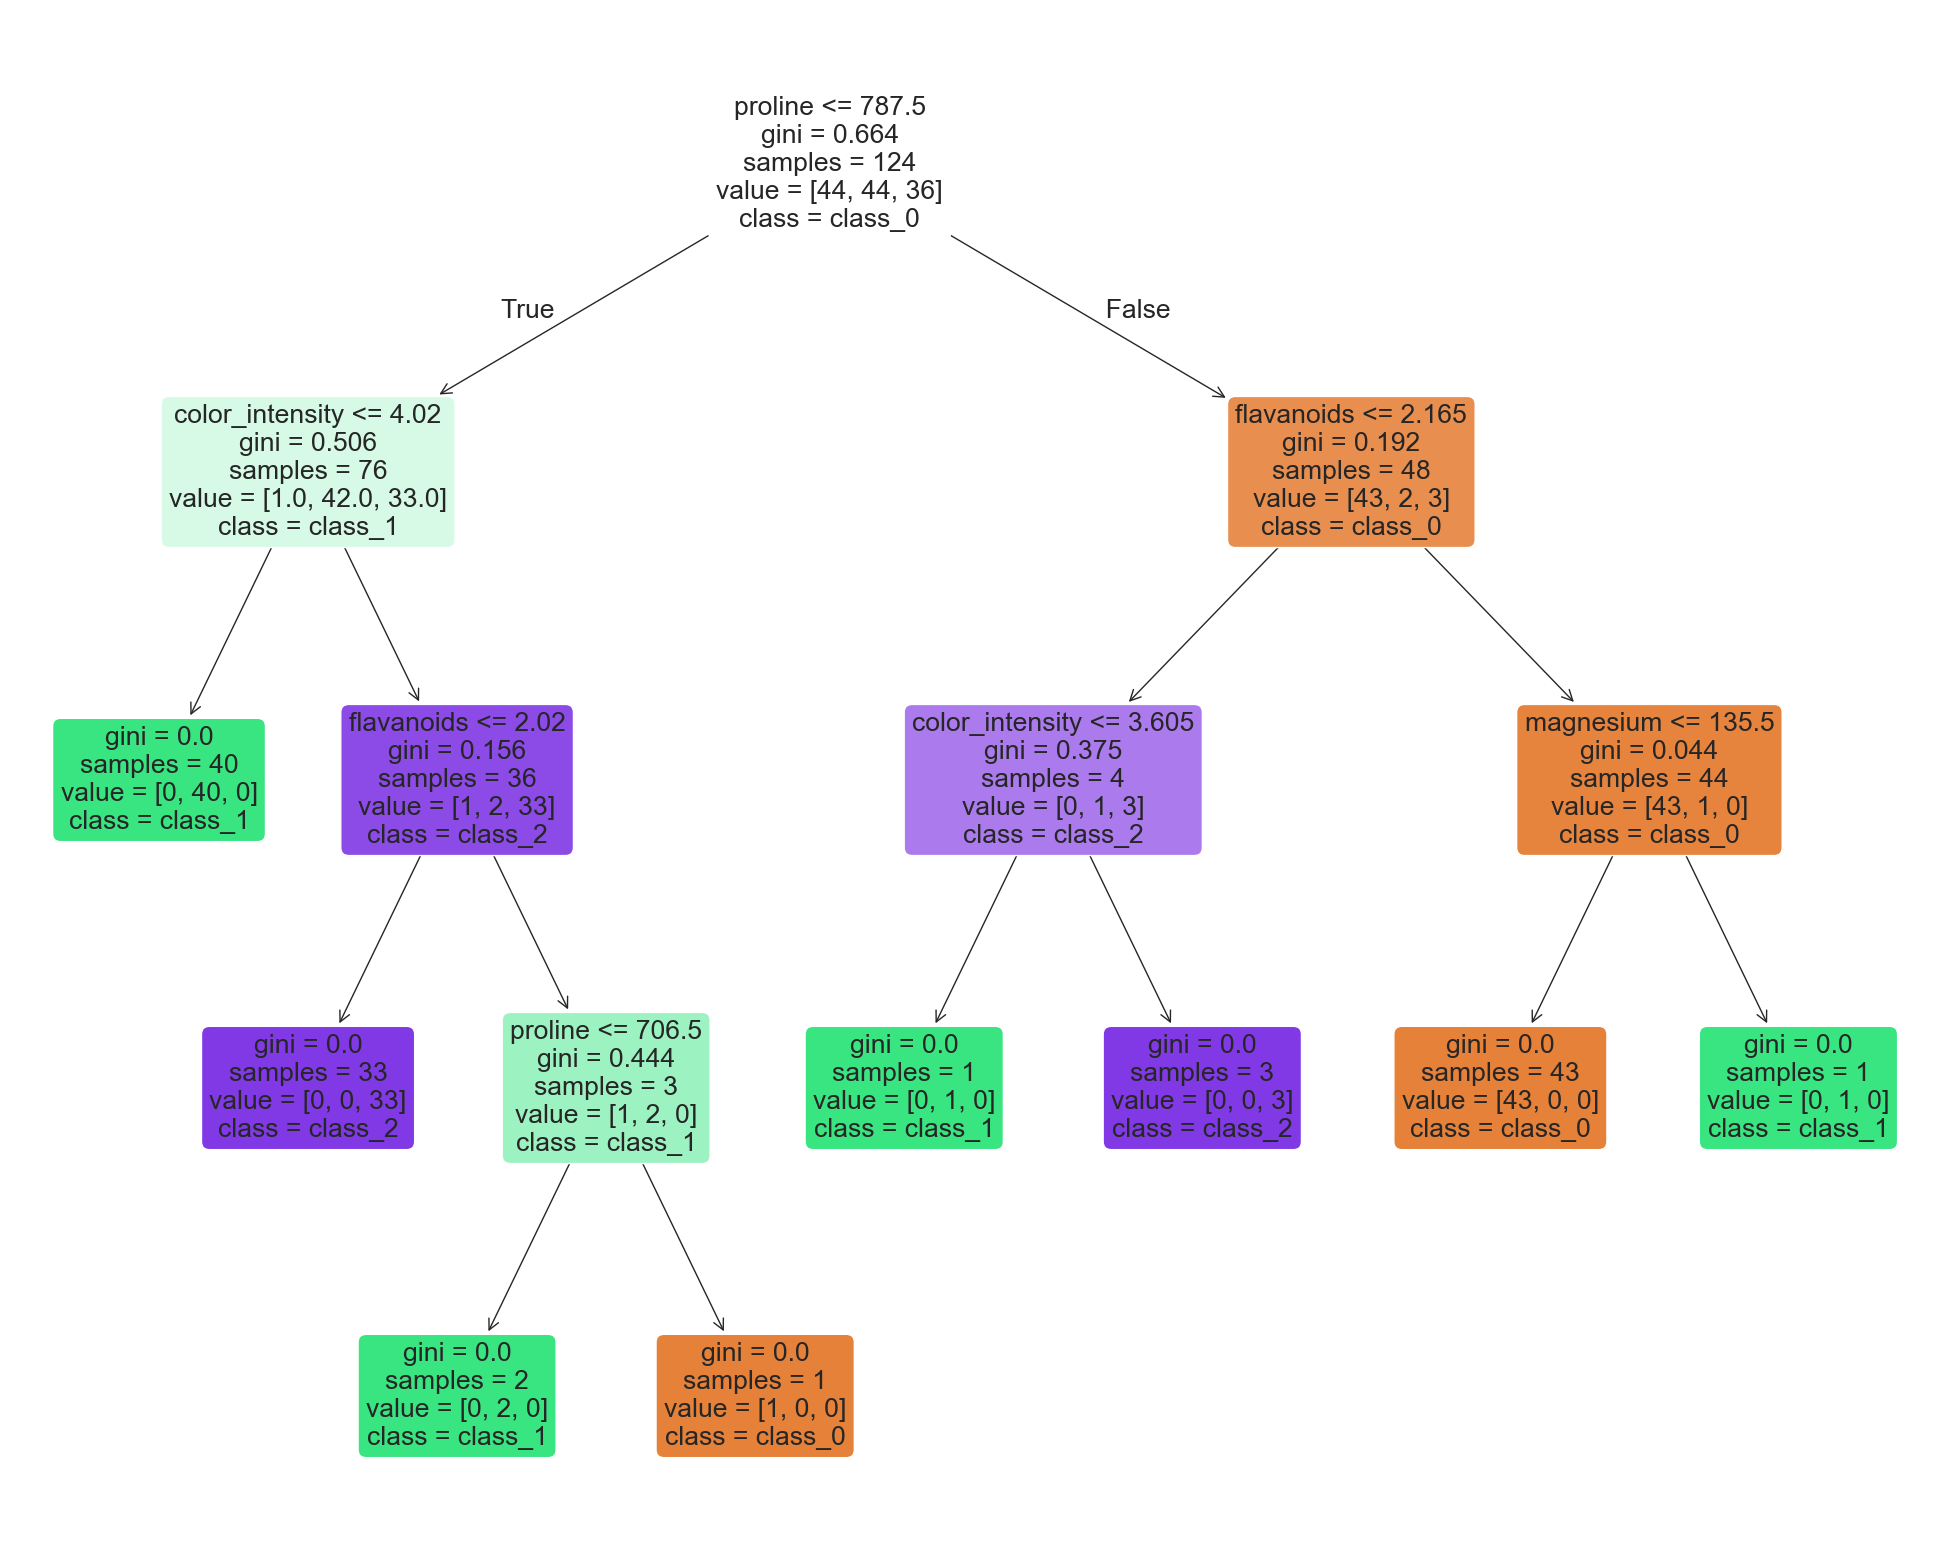

In [11]:
# Visualize tree
features = wine.feature_names
class_names = wine.target_names

fig, ax = plt.subplots(figsize=(25, 20))
tree.plot_tree(model, feature_names=features, class_names=class_names, filled=True, rounded=True)
plt.show()

In [12]:
# Contoh data poin wine sebagai dictionary
wine_test_data = {
    'alcohol': 13.2,
    'malic_acid': 2.77,
    'ash': 2.51,
    'alcalinity_of_ash': 18.5,
    'magnesium': 96.6,
    'total_phenols': 2.1,
    'flavanoids': 2.28,
    'nonflavanoid_phenols': 0.26,
    'proanthocyanins': 1.28,
    'color_intensity': 4.38,
    'hue': 1.05,
    'od280/od315_of_diluted_wines': 3.4,
    'proline': 1050
}

In [13]:
# Pastikan urutan fitur sesuai dengan data training
feature_order_wine = wine.feature_names
prediction_input_df_wine = pd.DataFrame([wine_test_data])
prediction_wine = model.predict(prediction_input_df_wine[feature_order_wine])

print(f"Prediksi kelas wine untuk data poin: {prediction_wine}")

# Kita juga bisa melihat nama kelas yang diprediksi
predicted_class_name = wine.target_names[prediction_wine[0]]
print(f"Nama kelas wine yang diprediksi: {predicted_class_name}")

Prediksi kelas wine untuk data poin: [0]
Nama kelas wine yang diprediksi: class_0
